<a href="https://colab.research.google.com/github/harshithgowdakc/own_projects/blob/main/face_Mask_Detection_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

**Importing Face Mask Dataset**

In [3]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


In [6]:
# Importing the dependence
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as imping
import seaborn as sns

# image
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [7]:
with_mask_files = os.listdir("/content/data/with_mask")
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1201.jpg', 'with_mask_2989.jpg', 'with_mask_2556.jpg', 'with_mask_3404.jpg', 'with_mask_630.jpg']
['with_mask_1466.jpg', 'with_mask_2480.jpg', 'with_mask_2097.jpg', 'with_mask_3226.jpg', 'with_mask_2947.jpg']


In [8]:
without_mask_files = os.listdir("/content/data/without_mask")
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_3363.jpg', 'without_mask_1906.jpg', 'without_mask_1848.jpg', 'without_mask_2232.jpg', 'without_mask_2047.jpg']
['without_mask_3395.jpg', 'without_mask_213.jpg', 'without_mask_3481.jpg', 'without_mask_58.jpg', 'without_mask_3180.jpg']


In [9]:
type(with_mask_files)

list

In [10]:
print("Number of with mask images:", len(with_mask_files))
print("Number of with out mask images:", len(without_mask_files))

Number of with mask images: 3725
Number of with out mask images: 3828


In [11]:
# Creating label for two class of images
with_mask_labels = [1]*3725
without_mask_lables = [0]*3828

In [12]:
print(with_mask_labels[0:5])
print(with_mask_labels[-5:])

[1, 1, 1, 1, 1]
[1, 1, 1, 1, 1]


In [13]:
print(without_mask_lables[0:5])
print(without_mask_lables[-5:])

[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]


In [14]:
labels = with_mask_labels + without_mask_lables

In [15]:
type(labels)

list

In [16]:
len(labels)

7553

### **Displaying the images**

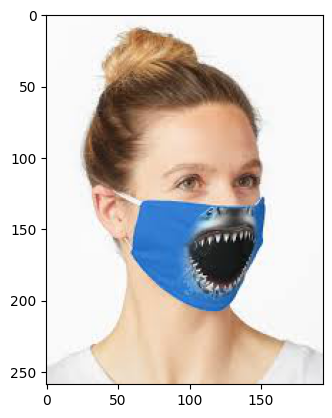

In [17]:
# Diplaying with one mask image
ing = imping.imread("/content/data/with_mask/with_mask_2989.jpg")
imgplot = plt.imshow(ing)
plt.show()

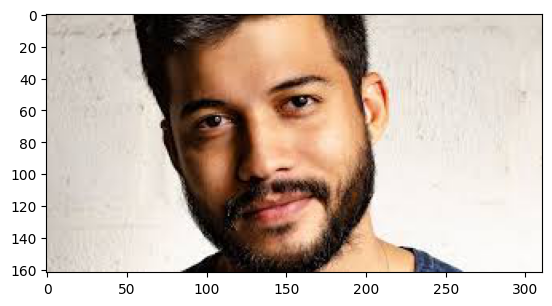

In [18]:
# Displaying without mask one images
ing = imping.imread("/content/data/without_mask/without_mask_2200.jpg")
imgplot = plt.imshow(ing)
plt.show()

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [19]:
# Convert all images into array
data = []

with_mask_path = "/content/data/with_mask/"

for img_files in with_mask_files:
  image = Image.open(with_mask_path + img_files)
  image = image.resize((128,128))
  image = image.convert("RGB")
  image = np.array(image)
  data.append(image)


without_mask_path = "/content/data/without_mask/"

for img_files in without_mask_files:
  image = Image.open(without_mask_path + img_files)
  image = image.resize((128,128))
  image = image.convert("RGB")
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [20]:
type(data[0])

numpy.ndarray

In [21]:
data[0].shape

(128, 128, 3)

In [22]:
# convert image list  and label into array
X = np.array(data)
Y = np.array(labels)

In [23]:
# Train Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 3)

In [24]:
#Scaling the data
X_train = X_train/255
X_test = X_test/255

Bulding a Convolutional Neural Network

In [25]:
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

In [26]:
num_of_class = 2
model = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3)),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(num_of_class, activation='sigmoid')
])


In [27]:
# Compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [28]:
#training the neural network
history = model.fit(X_train, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 15s 23ms/step - loss: 0.4541 - accuracy: 0.7914 - val_loss: 0.2747 - val_accuracy: 0.8727
Epoch 2/5
170/170 [==============================] - 3s 18ms/step - loss: 0.2777 - accuracy: 0.8887 - val_loss: 0.3039 - val_accuracy: 0.8645
Epoch 3/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2225 - accuracy: 0.9091 - val_loss: 0.2450 - val_accuracy: 0.8942
Epoch 4/5
170/170 [==============================] - 3s 17ms/step - loss: 0.1832 - accuracy: 0.9259 - val_loss: 0.2718 - val_accuracy: 0.9058
Epoch 5/5
170/170 [==============================] - 3s 17ms/step - loss: 0.1465 - accuracy: 0.9430 - val_loss: 0.2507 - val_accuracy: 0.9124


In [29]:
#Model Evaluation
loss, accuracy = model.evaluate(X_test, Y_test)
print(loss, accuracy)

48/48 [==============================] - 0s 9ms/step - loss: 0.2053 - accuracy: 0.9206
0.2053319662809372 0.9205824136734009


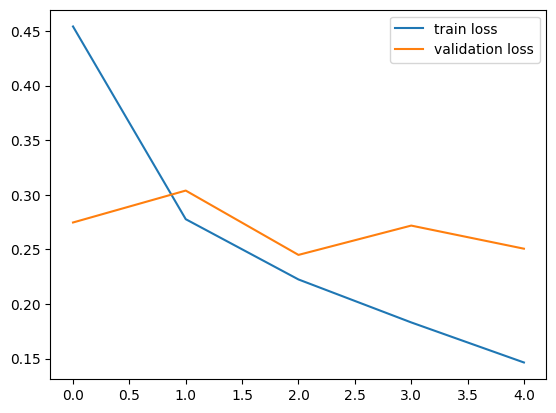

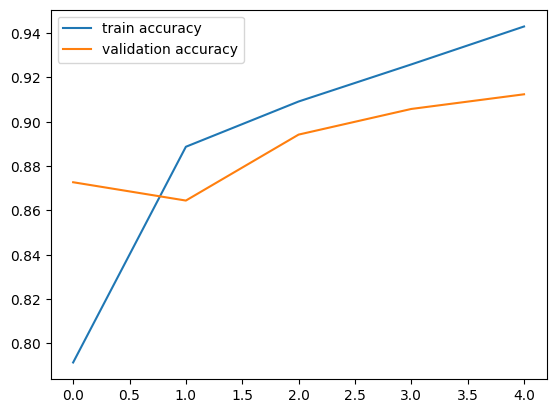

In [30]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['accuracy'], label='train accuracy')
plt.plot(h.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

Path of the image to be predicted: /content/face4.jfif


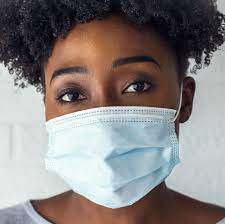

1/1 [==============================] - 0s 20ms/step
The person in the image is  wearing a mask


In [41]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

input_image_path = input("Path of the image to be predicted: ")
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128, 128))
input_image_rescaled = input_image_resized / 255.0

input_image_reshaped = np.reshape(input_image_rescaled, [1, 128, 128, 3])

input_prediction = model.predict(input_image_reshaped)
input_pred_label = np.argmax(input_prediction)

if input_pred_label == 1:
    print('The person in the image is not wearing a mask')
else:
    print('The person in the image is  wearing a mask')
